In [333]:
# import dependancies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)

https://www.kaggle.com/competitions/tmdb-box-office-prediction

In [334]:
# read data 
df = pd.read_csv('./train.csv')

In [335]:
df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [336]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [337]:
# describe
df.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


#### problems that i see
- [] movies with 0 budget
- [] belong to colloction contain null which means it is standalone movie
- [] zero runtime movies

In [338]:
# removing all unneccassary columns for our application
df = df[['belongs_to_collection', 'budget', 'genres', 'homepage',
       'original_language', 'overview',
       'popularity', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue']]

In [339]:
# Data Cleaning

In [340]:
# Univariate analysis
df['belongs_to_collection'] = df['belongs_to_collection'].apply(lambda x:np.nan if pd.isna(x) else eval(x)[0])

In [341]:
# taking only the name from the belong to colloction
df['belongs_to_collection'] = df['belongs_to_collection'].apply(lambda x:x['name'] if pd.notna(x) else 'standalone')

In [342]:
df['belongs_to_collection'].value_counts()

belongs_to_collection
standalone                                2396
James Bond Collection                       16
Friday the 13th Collection                   7
The Pink Panther (Original) Collection       6
Police Academy Collection                    5
                                          ... 
Pitch Perfect Collection                     1
Alpha and Omega Collection                   1
Bad Boys Collection                          1
F*ck You, Goethe Collection                  1
Save The Last Dance Collection               1
Name: count, Length: 423, dtype: int64

In [343]:
df['budget'].describe().apply(lambda x:f"{x:.0f}")

count         3000
mean      22531334
std       37026086
min              0
25%              0
50%        8000000
75%       29000000
max      380000000
Name: budget, dtype: object

In [344]:
df.query('budget==0')

,belongs_to_collection,budget,genres,homepage,original_language,overview,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
4,standalone,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,ko,Marine Boy is the story of a former national s...,1.148070,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970
7,standalone,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,en,A chronicle which provides a rare window into ...,1.949044,NaN,NaN,1/15/04,84.0,"[{'iso_639_1': 'ar', 'name': 'العربية'}, {'iso...",Released,Different channels. Different truths.,Control Room,"[{'id': 917, 'name': 'journalism'}, {'id': 163...","[{'cast_id': 2, 'character': 'Himself', 'credi...","[{'credit_id': '52fe47a69251416c750a0daf', 'de...",2586511
8,The Muppet Collection,0,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",NaN,en,After telling the story of Flint's last journe...,6.902423,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/16/96,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Set sail for Muppet mayhem!,Muppet Treasure Island,"[{'id': 2041, 'name': 'island'}, {'id': 4418, ...","[{'cast_id': 1, 'character': 'Long John Silver...","[{'credit_id': '52fe43c89251416c7501deb3', 'de...",34327391
11,Revenge of the Nerds Collection,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,en,The members of the Lambda Lambda Lambda frater...,10.543750,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",7/10/87,98.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,They're Back!,Revenge of the Nerds II: Nerds in Paradise,"[{'id': 5801, 'name': 'nerd'}, {'id': 6876, 'n...","[{'cast_id': 2, 'character': 'Lewis Skolnick',...","[{'credit_id': '52fe46f49251416c750891e9', 'de...",22642033
17,standalone,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,en,"In 1857, at the height of his fame and fortune...",4.183558,"[{'name': 'BBC Films', 'id': 288}, {'name': 'H...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",12/25/13,111.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,His greatest story was the one he could never ...,The Invisible Woman,"[{'id': 5565, 'name': 'biography'}, {'id': 180...","[{'cast_id': 7, 'character': 'Charles Dickens'...","[{'credit_id': '53b94a260e0a2676c7009b37', 'de...",1234254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2989,standalone,0,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",NaN,en,The adventures of a young Trumpeter swan who c...,0.851599,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",5/11/01,75.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Sometimes being different helps you to find yo...,The Trumpet Of The Swan,"[{'id': 6653, 'name': 'trumpet'}, {'id': 10407...","[{'cast_id': 1, 'character': 'Father', 'credit...","[{'credit_id': '58bc9d609251416084044b0e', 'de...",100202
2990,standalone,0,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",NaN,en,Can two clueless Georgia homegirls with big he...,1.560980,"[{'name': 'New Line Cinema', 'id': 12}, {'name...",NaN,3/28/97,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,These Pretty Women... Are Clueless!,B.A.P.S.,"[{'id': 1437, 'name': 'burglar'}, {'id': 1946,...","[{'cast_id': 3, 'character': 'Nisi', 'credit_i...","[{'credit_id': '52fe477b9251416c7509af57', 'de...",7240837
2994,standalone,0,"[{'id': 18, 'name': 'Drama'}]",NaN,en,When David Greene receives a football scholars...,7.438381,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...",9/18/92,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just because you’re 

In [345]:
# check all the movies which have budget 0
df = df.replace(0,np.nan)

In [346]:
# check all missing values
df.isnull().sum()

belongs_to_collection       0
budget                    812
genres                      7
homepage                 2054
original_language           0
overview                    8
popularity                  0
production_companies      156
production_countries       55
release_date                0
runtime                    14
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

In [347]:
# Drop home page
df.drop(columns='homepage',inplace=True)

In [348]:
# taking all geners in a list

In [349]:
# remove all the space in the string to match the regex
df['genres'] = df['genres'].str.replace(' ','')

In [350]:
# Taking all the genre in list
df['genres'] = df['genres'].str.findall(r"'name':'([A-Za-z]+)")

In [351]:
df['original_language'].value_counts().head(5)

original_language
en    2575
fr      78
ru      47
es      43
hi      42
Name: count, dtype: int64

In [352]:
# dropping the overview column
df.drop(columns='overview',inplace=True)

In [353]:
# convert release data into datetime
df['release_date'] = pd.to_datetime(df['release_date'])

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_12412\352950337.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['release_date'] = pd.to_datetime(df['release_date'])


In [354]:
df['status'].value_counts()

status
Released    2996
Rumored        4
Name: count, dtype: int64

In [355]:
# remove all remored movie
df = df.query('status!="Rumored"')

In [356]:
# drop status feature
df.drop(columns='status',inplace=True)

In [357]:
df.drop(columns='tagline',inplace=True)

In [358]:
df['production_companies'] = df['production_companies'].str.replace(' ','').str.findall(r"'name':'([A-Za-z\-\(\)]+)")

In [359]:
df['production_companies']

0       [ParamountPictures, UnitedArtists, Metro-Goldw...
1                                    [WaltDisneyPictures]
2       [BoldFilms, BlumhouseProductions, RightofWayFi...
3                                                     NaN
4                                                     NaN
                              ...                        
2995                 [WarnerBros, MorganCreekProductions]
2996                                 [MemfisFilm, FilmiV]
2997         [NewLineCinema, Forge, TheSteveTischCompany]
2998                     [JerseyFilms, LoofahProductions]
2999    [LionsGateFilms, VertigoEntertainment, GothamG...
Name: production_companies, Length: 2996, dtype: object

In [360]:
# extract all the production companies in list
df['production_countries'] = df['production_countries'].str.replace(' ','').str.findall(r"'name':'([A-Za-z\-\(\)]+)")

In [361]:
# extract the spoken language
df['spoken_languages'] = df['spoken_languages'].str.replace(' ','').str.findall(r"'iso_639_1':'([A-Za-z\-\(\)]+)")

In [362]:
df['Keywords'] = df['Keywords'].str.findall(r"'name': '([\sA-Za-z\-\(\)]+)'")

In [363]:
df['cast'] = df['cast'].str.findall(r"'name': '([\sA-Za-z\-\(\)]+)'")

In [364]:
df['crew'] = df['crew'].str.findall(r"'name': '([\sA-Za-z\-\(\)]+)'")

In [365]:
# standalone movie or not
df['standalone_movie'] = (df['belongs_to_collection']=='standalone').astype(int)

In [366]:
df.drop(columns=['belongs_to_collection','title'],inplace=True)

In [367]:
df['genres'].fillna('missing',inplace=True)

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_12412\131706787.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['genres'].fillna('missing',inplace=True)


In [368]:
df['genres'] = df['genres'].apply(lambda x:','.join(x))

In [369]:
def remove_list_space(list1):
    text = ','.join(list1)
    text = text.replace(' ','')
    return text

In [370]:
'hai hai'.replace(' ','')

'haihai'

In [371]:
df['production_companies'] = df['production_companies'].fillna('missing').apply(remove_list_space)

In [372]:
df['production_countries'] = df['production_countries'].fillna('missing').apply(remove_list_space)

In [373]:
df['Keywords'] = df['Keywords'].fillna('missing').apply(remove_list_space)
df['spoken_languages'] = df['spoken_languages'].fillna('en').apply(remove_list_space)

In [374]:
for feature in ['cast','crew']:
    df[feature] = df[feature].fillna('missing').apply(remove_list_space)

In [375]:
for feature in df.select_dtypes('O').columns:
    df[feature] = df[feature].apply(lambda x:x.lower().replace(',',' '))

In [376]:
df.replace('m i s s i n g',np.nan,inplace=True)

In [377]:
# filling the missing value
df['genres'] = df.genres.fillna('comedy drama romance')

In [378]:
df['original_language'].fillna('en',inplace=True)

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_12412\410087012.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['original_language'].fillna('en',inplace=True)


In [379]:
# dropping the columns with no production companies
df['production_companies'].fillna('missing',inplace=True)

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_12412\742930877.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['production_companies'].fillna('missing',inplace=True)


In [380]:
df['production_countries'].fillna('unitedstatesofamerica',inplace=True)

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_12412\83513139.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['production_countries'].fillna('unitedstatesofamerica',inplace=True)


In [381]:
df['release_year'] = df['release_date'].dt.year
df['release_month'] = df['release_date'].dt.month

In [382]:
df['spoken_languages'].fillna('en',inplace=True)

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_12412\716064705.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['spoken_languages'].fillna('en',inplace=True)


In [384]:
df['cast'].fillna('missing',inplace=True)
df['crew'].fillna('missing',inplace=True)
df['Keywords'].fillna('missing',inplace=True)

In [391]:
df['runtime'].fillna(df['runtime'].median(),inplace=True)

<Axes: xlabel='budget', ylabel='Count'>

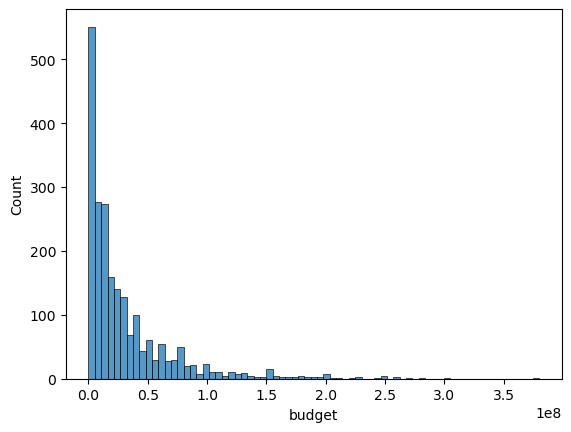

In [394]:
sns.histplot(df['budget'].)

In [410]:
# concat all the catogories
df.select_dtypes('O').sample(1)

,genres,original_language,production_companies,production_countries,spoken_languages,Keywords,cast,crew
635,drama family fantasy adventure,en,producerssalesorganization bavariafilm dieterg...,germany unitedstatesofamerica,en,basedonnovel fictionalplace wolf mythology mag...,barretoliver geraldmcraney noahhathaway drumga...,berndeichinger janeseitz rolfzehetbauer wolfga...


In [411]:
for feature in df.select_dtypes('O').columns:
    df['catogeries'] = ' '+ df[feature]

In [415]:
df['catogeries'] = df['catogeries'].str.strip()

In [421]:
# drop other catogories column
final_df = df.select_dtypes(include=['int',float])
final_df['catogeries'] = df['catogeries']

In [426]:
final_df = final_df[['budget', 'popularity', 'runtime', 'standalone_movie',
       'release_year', 'release_month', 'catogeries', 'revenue']]